### Vamos a ver cuanto % de estrellas hay en rgal 

In [9]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/home/ornela/SimCLUES/'
# path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

# path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,495,-1)

for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
    for i in range(0,3):
        cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'][()]
        r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'][()]
        
        pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
        mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'][()]
        
        pgas = snap['subhalo_0'+ str('%s'%vector[i]) + '/Gas/Coordinates'][()]
        mgas = snap['subhalo_0'+ str('%s'%vector[i]) + '/Gas/Masses'][()]
        
        z = a0/aexp[0] - 1.
        Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)
        
#---aca paso las coordenadas respecto al centro de la galaxia------
        xstr = (pstr[:,0]-cm[0])*aexp[0]/h
        ystr = (pstr[:,1]-cm[1])*aexp[0]/h
        zstr = (pstr[:,2]-cm[2])*aexp[0]/h
        rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
        
        xgas = (pgas[:,0]-cm[0])*aexp[0]/h
        ygas = (pgas[:,1]-cm[1])*aexp[0]/h
        zgas = (pgas[:,2]-cm[2])*aexp[0]/h
        rgas = np.sqrt(xgas**2+ygas**2+zgas**2)
#----------------------masas----------------------------
        mstr = mstr*1e10/h
        mgas = mgas*1e10/h
        
        r200 = r200*aexp[0]/h
        
        print 'r200 =', r200
        rgal=0.15*r200
        
        limit = np.where(rstr<rgal)
        
        limit_str = np.where(rstr<r200)
        
        limit_gas = np.where(rgas<r200)
        limitgas  = np.where(rgas<rgal)
        
        
        Mstellar_200 = sum(mstr[limit_str])        
        Mstellar_rgal = sum(mstr[limit])
        
        Mgas_200 = sum(mgas[limit_gas])        
        Mgas_rgal = sum(mgas[limitgas])        
        
        print 'Mstellar_200 = ', str('%1.3e' %Mstellar_200)
        print 'Mstellar_rgal = ',str('%1.3e' %Mstellar_rgal)
        print 'Porcentaje_stellar = ', Mstellar_rgal/Mstellar_200
        print 'Porcentaje_gas = ', Mgas_rgal/Mgas_200        

r200 = 167.2103825136612
Mstellar_200 =  1.960e+10
Mstellar_rgal =  1.335e+10
Porcentaje_stellar =  0.68119115393037
Porcentaje_gas =  0.0908623421386678
r200 = 153.54234972677597
Mstellar_200 =  1.607e+10
Mstellar_rgal =  1.381e+10
Porcentaje_stellar =  0.8591755959547315
Porcentaje_gas =  0.13005303258948095
r200 = 123.1120218579235
Mstellar_200 =  8.771e+09
Mstellar_rgal =  7.970e+09
Porcentaje_stellar =  0.9086710302729495
Porcentaje_gas =  0.2573485628722771


In [11]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

vector = (1,2,4)
vector2 = ('M31', 'MW', 'M33')
G = 4.299e-6
a0 =1.

path = '/home/ornela/SimCLUES/'

# path = '/mnt/sersic2/omarioni/'

snapshot = np.loadtxt(path+'Gasoline/snapshots.txt', dtype='string')


snap = h5py.File(path+'Gasoline/outputs2/snap_1024.h5py', 'r')

for i in range(0,3):
    cm   = snap['subhalo_00'+ str('%s' %vector[i])+ '/Center'][()]
    r200 = snap['subhalo_00'+ str('%s' %vector[i])+ '/R200'][()]
    aexp = snap['subhalo_00'+ str('%s' %vector[i])+ '/aexp'][()]
    h    = snap['subhalo_00'+ str('%s' %vector[i])+ '/h'][()]
    
    omega_lambda = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaL0'][()]
    omega_matter = snap['subhalo_00'+ str('%s' %vector[i])+ '/OmegaM0'][()]

    pstr = snap['subhalo_00'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_00'+ str('%s' %vector[i]) + '/Str/Masses'][()]

    pgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Coordinates'][()]
    mgas = snap['subhalo_00'+ str('%s' %vector[i])+ '/Gas/Masses'][()]

    H0 = h*100
    z = a0/aexp - 1.
    omega0 = omega_lambda + omega_matter
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0]) #*aexp
    ystr = (pstr[:,1]-cm[1])
    zstr = (pstr[:,2]-cm[2])
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)

    xgas = (pgas[:,0]-cm[0])
    ygas = (pgas[:,1]-cm[1])
    zgas = (pgas[:,2]-cm[2])
    rgas = np.sqrt(xgas**2+ygas**2+zgas**2)

#------------------------------------------------
    r200 = r200*aexp
    
    print 'r200=', r200
    rgal=0.15*r200

    limit = np.where(rstr<rgal)

    limit_str = np.where(rstr<r200)

    limit_gas = np.where(rgas<r200)
    limitgas  = np.where(rgas<rgal)


    Mstellar_200 = sum(mstr[limit_str])        
    Mstellar_rgal = sum(mstr[limit])

    Mgas_200 = sum(mgas[limit_gas])        
    Mgas_rgal = sum(mgas[limitgas])        

    print 'Mstellar_200 = ', str('%1.3e' %Mstellar_200)
    print 'Mstellar_rgal = ',str('%1.3e' %Mstellar_rgal)
    print 'Porcentaje_stellar = ', Mstellar_rgal/Mstellar_200
    print 'Porcentaje_gas = ', Mgas_rgal/Mgas_200        

r200= 166.84000000234064
Mstellar_200 =  1.450e+10
Mstellar_rgal =  1.115e+10
Porcentaje_stellar =  0.7687321118867443
Porcentaje_gas =  0.1325738321929888
r200= 150.46000000211083
Mstellar_200 =  1.105e+10
Mstellar_rgal =  1.026e+10
Porcentaje_stellar =  0.9282155243051996
Porcentaje_gas =  0.09475931019164446
r200= 119.62000000167818
Mstellar_200 =  5.082e+09
Mstellar_rgal =  4.843e+09
Porcentaje_stellar =  0.9529970643546395
Porcentaje_gas =  0.506863742692634


### Aislamos el satélite 

In [24]:
import matplotlib.pyplot as plt
import h5py
import rotation as rot
import numpy as np

vector = ('00','01','03')
vector2 = ('M31', 'MW', 'M33')
h=0.732
G = 4.299e-6
a0=1
H0 = h*100
omega_lambda=0.716
omega_matter=0.1277/(h**2.)
omega0 = omega_lambda + omega_matter

path = '/home/ornela/SimCLUES/'
# path = '/home/omarioni/'
atime = np.loadtxt(path + 'redshift_outputs.txt')
aexp = atime[:,2]
aexp = aexp[::-1]

# path = '/mnt/is2/alejandro/ornella/'

snapshot=range(496,495,-1)

for isnap in snapshot:
    snap = h5py.File(path + 'outputs_1/snap_'+str('%03d'%isnap)+'.h5py', 'r')
    
#     for i in range(0,3):
    i=0
    cm   = snap['subhalo_0'+ str('%s'%vector[i])+ '/Center'][()]
    r200 = snap['subhalo_0'+ str('%s'%vector[i])+ '/R200'][()]

    pstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Coordinates'][()]
    mstr = snap['subhalo_0'+ str('%s'%vector[i]) + '/Str/Masses'][()]

    z = a0/aexp[0] - 1.
    Ht = H0*np.sqrt(omega_lambda+(1-omega0)*(1+z)**2+omega_matter*(1+z)**3)

#---aca paso las coordenadas respecto al centro de la galaxia------
    xstr = (pstr[:,0]-cm[0])*aexp[0]/h
    ystr = (pstr[:,1]-cm[1])*aexp[0]/h
    zstr = (pstr[:,2]-cm[2])*aexp[0]/h
    rstr = np.sqrt(xstr**2+ystr**2+zstr**2)
#----------------------masas----------------------------
    mstr = mstr*1e10/h

    r200 = r200*aexp[0]/h

    print 'r200 =', r200
    rgal=0.15*r200

    limit = np.where(rstr<rgal)

    limit_str = np.where(rstr<r200)

    Mstellar_200 = sum(mstr[limit_str])        
    Mstellar_rgal = sum(mstr[limit])

    print 'Mstellar_200 = ', str('%1.3e' %Mstellar_200)
    print 'Mstellar_rgal = ',str('%1.3e' %Mstellar_rgal)
    print 'Porcentaje_stellar = ', Mstellar_rgal/Mstellar_200

r200 = 167.2103825136612
Mstellar_200 =  1.960e+10
Mstellar_rgal =  1.335e+10
Porcentaje_stellar =  0.68119115393037


Text(0,0.5,'z [kpc]')

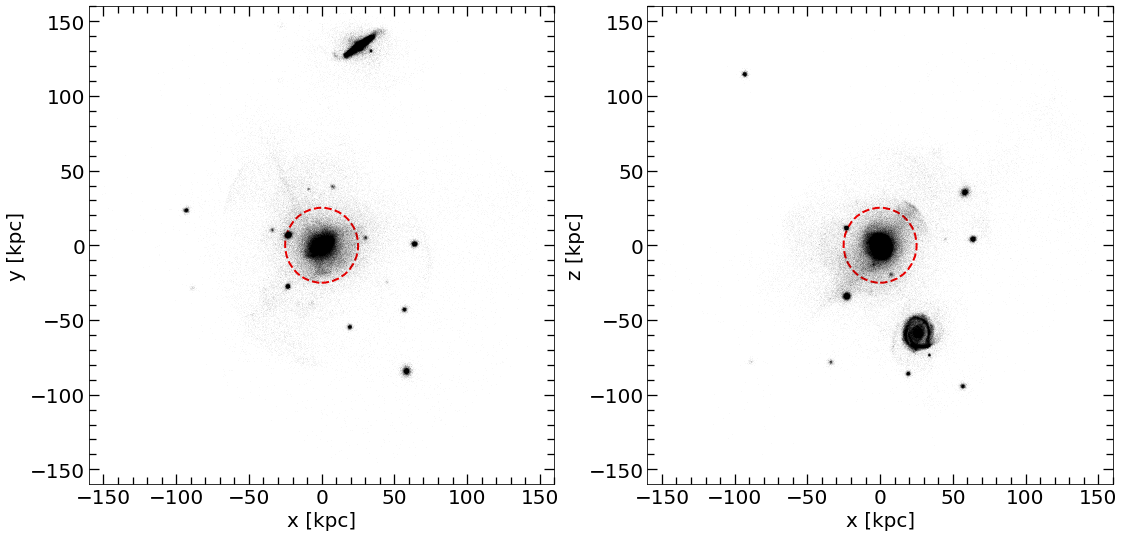

In [49]:
from matplotlib.patches import Circle

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True)
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95,hspace=0)

ax[0].plot(xstr[limit_str],ystr[limit_str],'.k',markersize=0.02)
circle = Circle((0,0), radius= rgal, facecolor='none', ls='--', edgecolor='r',lw=2)
ax[0].add_patch(circle)
ax[0].set_xlim(-160,160)
ax[0].set_ylim(-160,160)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=20)
ax[0].tick_params('both', length=7, width=1.3,which='minor', direction='in', right=True,top=True)
ax[0].tick_params('both', length=10, width=1.3,which='major', direction='in', right=True,top=True)
ax[0].set_xlabel('x [kpc]', fontsize=20)
ax[0].set_ylabel('y [kpc]', fontsize=20)

ax[1].plot(xstr[limit_str],zstr[limit_str],'.k',markersize=0.02)
circle = Circle((0,0), radius= rgal, facecolor='none', ls='--', edgecolor='r',lw=2)
ax[1].add_patch(circle)
ax[1].set_xlim(-160,160)
ax[1].set_ylim(-160,160)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=20)
ax[1].tick_params('both', length=7, width=1.3,which='minor', direction='in', right=True,top=True)
ax[1].tick_params('both', length=10, width=1.3,which='major', direction='in', right=True,top=True)
ax[1].set_xlabel('x [kpc]', fontsize=20)
ax[1].set_ylabel('z [kpc]', fontsize=20)


Text(0,0.5,'z [kpc]')

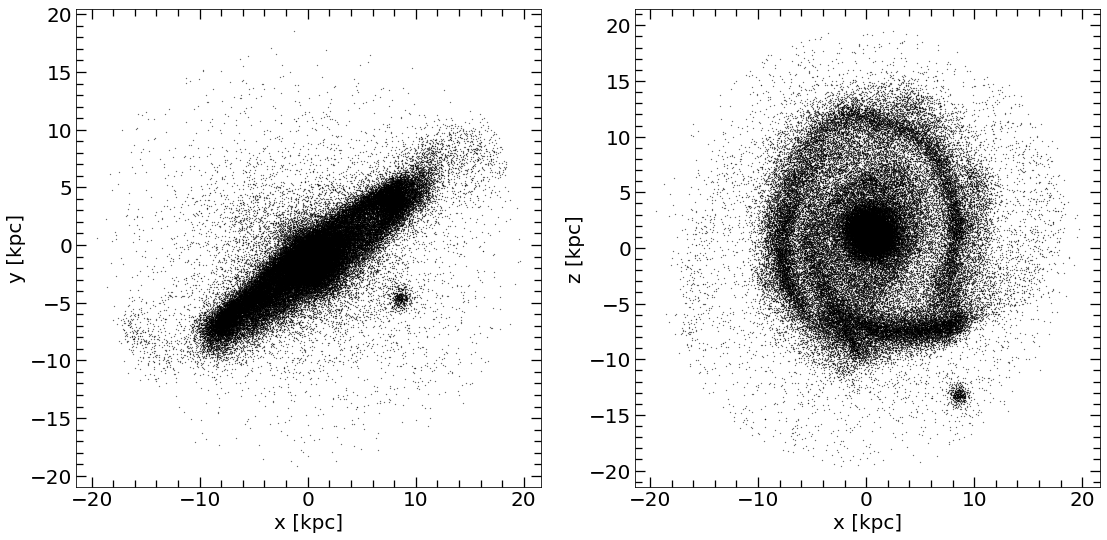

In [50]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 8), sharex=True)
fig.subplots_adjust(bottom=0.12, left =0.16, right = 0.95, top = 0.95,hspace=0)

xstr_ = xstr[limit_str] - 25
ystr_ = ystr[limit_str] - 135
zstr_ = zstr[limit_str] + 60

r_ = np.sqrt(xstr_**2 + ystr_**2 + zstr_**2)

mask, = np.where(r_<20)
ax[0].plot(xstr_[mask],ystr_[mask],'.k',markersize=0.5)
ax[0].minorticks_on()
ax[0].tick_params( labelsize=20)
ax[0].tick_params('both', length=7, width=1.3,which='minor', direction='in', right=True,top=True)
ax[0].tick_params('both', length=10, width=1.3,which='major', direction='in', right=True,top=True)
ax[0].set_xlabel('x [kpc]', fontsize=20)
ax[0].set_ylabel('y [kpc]', fontsize=20)

ax[1].plot(xstr_[mask],zstr_[mask],'.k',markersize=0.5)
ax[1].minorticks_on()
ax[1].tick_params( labelsize=20)
ax[1].tick_params('both', length=7, width=1.3,which='minor', direction='in', right=True,top=True)
ax[1].tick_params('both', length=10, width=1.3,which='major', direction='in', right=True,top=True)
ax[1].set_xlabel('x [kpc]', fontsize=20)
ax[1].set_ylabel('z [kpc]', fontsize=20)

In [25]:
Mstellar_sat = sum(mstr[limit_str][mask])
print Mstellar_sat
print Mstellar_sat / Mstellar_200

3476648132.6171875
0.17733927101034055
